In [147]:
file = 'DATA/list10000polyg_N400_seq0001_be0.400_3d_ooo.dat'
with open (file, "r") as myfile:
    full_data=myfile.readlines()
data=list(full_data[3][:-1])
print(data)

['1', '1', '5', '5', '1', '2', '2', '2', '3', '4', '3', '4', '5', '3', '3', '3', '3', '1', '0', '2', '4', '0', '1', '1', '0', '2', '1', '0', '2', '0', '4', '3', '4', '4', '5', '3', '5', '4', '0', '0', '5', '5', '5', '1', '2', '2', '1', '1', '3', '2', '2', '4', '3', '5', '5', '3', '1', '0', '5', '4', '0', '4', '4', '5', '3', '3', '2', '3', '1', '3', '1', '1', '5', '4', '3', '5', '5', '4', '4', '2', '0', '1', '3', '2', '0', '0', '0', '1', '3', '5', '0', '4', '5', '4', '0', '4', '5', '5', '3', '4', '4', '5', '3', '3', '1', '2', '0', '5', '0', '1', '5', '1', '2', '1', '1', '0', '2', '1', '3', '1', '3', '3', '3', '4', '4', '4', '2', '0', '2', '4', '4', '5', '4', '0', '2', '0', '5', '1', '1', '5', '1', '1', '3', '3', '4', '4', '2', '0', '1', '1', '3', '1', '5', '5', '5', '4', '3', '2', '4', '0', '4', '5', '0', '5', '3', '1', '0', '2', '1', '1', '0', '5', '0', '0', '4', '2', '4', '4', '0', '4', '4', '3', '3', '3', '4', '3', '1', '1', '2', '1', '2', '1', '5', '1', '1', '0', '1', '5', '1', '5',

In [148]:
cx, cy, cz = 0,0,0
fcx,fcy,fcz=[],[],[]

for i in data:
    if i=='0':
        cx+=1
    elif i=='1':
        cy+=1
    elif i=='2':
        cz+=1        
    elif i=='3':
        cx-=1
    elif i=='4':
        cy-=1
    elif i=='5':
        cz-=1
    
    fcx.append(cx)
    fcy.append(cy)
    fcz.append(cz)

minx,miny,minz=np.amin(fcx),np.amin(fcy),np.amin(fcz)
for i in range(0,len(fcx)):
    fcx[i]=fcx[i]+abs(minx)
    fcy[i]=fcy[i]+abs(miny)
    fcz[i]=fcz[i]+abs(minz)

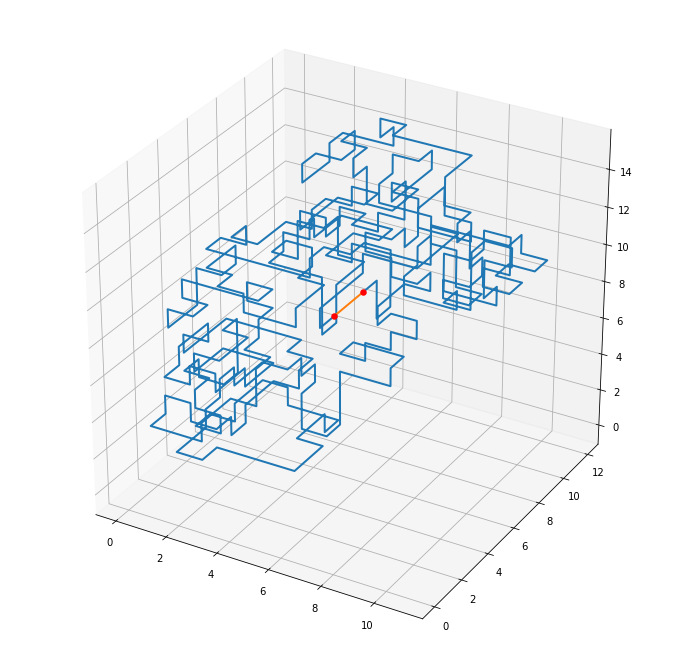

In [150]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot( projection='3d')
ax.plot(fcx, fcy, fcz, lw=2)
ax.scatter(fcx[0], fcy[0], fcz[0], lw=2, c='r')
ax.scatter(fcx[-1], fcy[-1], fcz[-1], lw=2, c='r')
ax.view_init(30)
ax.plot([fcx[0],fcx[-1]], [fcy[0],fcy[-1]], [fcz[0],fcz[-1]], lw=2);

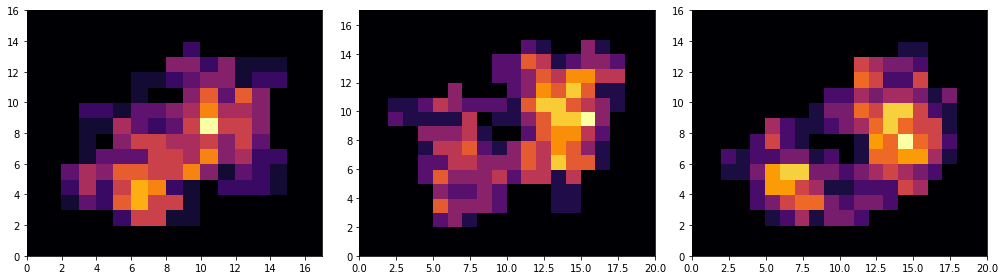

In [151]:
pic2dz=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcy)+5))
pic2dx=np.zeros(shape=(np.amax(fcy)+5,np.amax(fcz)+5))
pic2dy=np.zeros(shape=(np.amax(fcx)+5,np.amax(fcz)+5))

for x,y,z in zip(fcx,fcy,fcz):
    pic2dz[x+2,y+2]+=1
    pic2dx[y+2,z+2]+=1
    pic2dy[x+2,z+2]+=1

fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(14,4))

ax0.pcolor(pic2dz, cmap="inferno")
ax1.pcolor(pic2dx, cmap="inferno")
ax2.pcolor(pic2dy, cmap="inferno")
fig.tight_layout()
plt.show()